# 01 Map Greenland
This is a simple exerciese of mapping Greenland.

In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
df = pd.read_csv('data\promice.csv')
# if in colab:
# df = pd.read_csv('https://raw.githubusercontent.com/fsn1995/GIS-at-deep-purple/main/data/promice.csv')
df.Longitude = df.Longitude * -1

## scatter plot with open street layer as basemap

In [ ]:
# df = px.data.gapminder().query("year == 2007")
fig = px.scatter_mapbox(df,
                     lat=df.Latitude,
                     lon=df.Longitude,
                    #  color="", # which column to use to set the color of markers
                     hover_name="Station",
                     hover_data=["m.a.s.l", "StartDate"],
                     zoom=2,
                     width=650,
                     height=500,
                     center=dict(
                         lat=df.Latitude.mean(),
                         lon=df.Longitude.mean()
                     )) # column added to hover information)
# fig.update_layout(mapbox_style="stamen-terrain") # open-street-map satellite
fig.update_layout(
    mapbox_style="open-street-map",
    # geo=dict(
    #     lonaxis = dict(
    #         showgrid = True,
    #         gridwidth = 0.5,
    #         range= [ -70.0, -20.0 ],
    #         dtick = 5),
    #     lataxis = dict (
    #         showgrid = True,
    #         gridwidth = 0.5,
    #         range= [ 55.0, 80.0 ],
    #         dtick = 5)
    #     )
    
    ) 

fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})                    
fig.show()
fig.write_html('output/01promiceOpenStreetMap.html')


## scatter plot with satellite data as basemap

You will need a mapbox token if you want to use high resolution satellite data as basemap. It's free to use but must register first https://plotly.com/python/mapbox-layers/

In [ ]:
token = ''
# df = px.data.gapminder().query("year == 2007")
fig = px.scatter_mapbox(df,
                     lat=df.Latitude,
                     lon=df.Longitude,
                    #  color="", # which column to use to set the color of markers
                     hover_name="Station",
                     hover_data=["m.a.s.l", "StartDate"],
                     zoom=2,
                     width=650,
                     height=500,
                     center=dict(
                         lat=df.Latitude.mean(),
                         lon=df.Longitude.mean()
                     )) # column added to hover information)
# fig.update_layout(mapbox_style="stamen-terrain") 
fig.update_layout(mapbox_style="satellite", mapbox_accesstoken=token) 
# fig.update_geos(lataxis_showgrid=True, lonaxis_showgrid=True)
# fig.update_layout(
#     mapbox_style="white-bg",
#     mapbox_layers=[
#         {
#             "below": 'traces',
#             "sourcetype": "raster",
#             "sourceattribution": "United States Geological Survey",
#             "source": [
#                 "https://basemap.nationalmap.gov/arcgis/rest/services/USGSImageryOnly/MapServer/tile/{z}/{y}/{x}"
#             ]
#         }
#       ])
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})                    
fig.show()
fig.write_html('output/01promiceSatellite.html')


## change map projection

In [ ]:
fig = go.Figure(data=go.Scattergeo(
    lat = df['Latitude'],
    lon = df['Longitude'],
    text = df['Station'].astype(str),
))
# fig.update_geos(lataxis_showgrid=True, lonaxis_showgrid=True)
fig.update_layout(
    geo = dict(
        scope = 'world',
        showland = True,
        landcolor = "rgb(212, 212, 212)",
        subunitcolor = "rgb(255, 255, 255)",
        countrycolor = "rgb(255, 255, 255)",
        # showlakes = True,
        # lakecolor = "rgb(255, 255, 255)",
        showsubunits = True,
        showcountries = True,
        resolution = 50, # The values have units of km/mm e.g. 110 corresponds to a scale ratio of 1:110,000,000.
        projection = dict(
            type="conic conformal",
        ),
        lonaxis = dict(
            showgrid = True,
            gridwidth = 0.5,
            range= [ -70, -20.0 ],
            dtick = 5
        ),
        lataxis = dict (
            showgrid = True,
            gridwidth = 0.5,
            range= [ 50.0, 70.0 ],
            dtick = 5
        ),
        center=dict(
            lat=df.Latitude.mean(),
            lon=df.Longitude.mean()
        )
    ),
    title='Promice Station <br>Source: <a href="https://promice.org/PromiceDataPortal/#Automaticweatherstations">Promice</a>',
    width=650,
    height=500,
)
fig.show()
fig.write_html('output/01promiceChangeProjection.html')

# cartopy projection

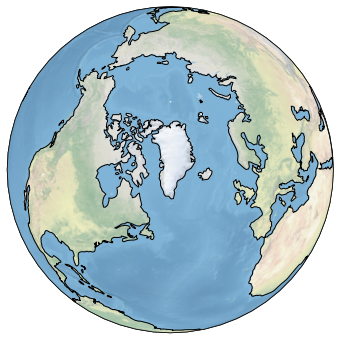

In [ ]:
# if in colab:
# !pip install cartopy
import cartopy.crs as crs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(1,1,1, projection=crs.NearsidePerspective(
    central_longitude=df.Longitude.mean()
    ))

ax = fig.add_subplot(1,1,1, projection=crs.NearsidePerspective(
    central_longitude=df.Longitude.mean(), central_latitude=df.Latitude.mean()
    ))

ax.stock_img()
ax.coastlines()

# plt.scatter(x=df.Longitude, y=df.Latitude,
#             color="dodgerblue",
#             s=1,
#             alpha=0.5,
#             transform=crs.NearsidePerspective(
#                 central_longitude=df.Longitude.mean(), central_latitude=df.Latitude.mean()
#             )) ## Important

# plt.show()

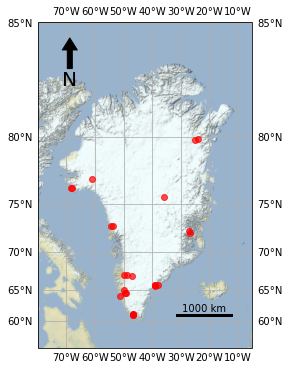

In [ ]:
from scalebar import scale_bar
import matplotlib.pyplot as plt
from matplotlib.transforms import offset_copy

import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt

# ref: https://scitools.org.uk/cartopy/docs/v0.15/examples/eyja_volcano.html
def main():
    # Create a Stamen Terrain instance.
    stamen_terrain = cimgt.Stamen('terrain-background') 
    fig= plt.figure(figsize=(8,6))
    # Create a GeoAxes in the tile's projection.
    ax = plt.axes(projection=stamen_terrain.crs)

    # Limit the extent of the map to a small longitude/latitude range.
    ax.set_extent([-80, -5, 55, 90])
    ax.gridlines(draw_labels=True)
    # change zoom level to adjust the resolution.
    ax.add_image(stamen_terrain, 3)

    # Add a marker for stations.
    for i in range(len(df)):
        plt.plot(df.Longitude[i], df.Latitude[i], marker='o', color='red', markersize=6,
             alpha=0.7, transform=ccrs.Geodetic())


    x, y, arrow_length = 0.15, 0.95, 0.1
    ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
                arrowprops=dict(facecolor='black', width=5, headwidth=15),
                ha='center', va='top', fontsize=20,
                xycoords=ax.transAxes)
    scale_bar(ax, (0.65, 0.1), 1000, color='black')
    # Use the cartopy interface to create a matplotlib transform object
    # for the Geodetic coordinate system. We will use this along with
    # matplotlib's offset_copy function to define a coordinate system which
    # translates the text by 25 pixels to the left.
    # geodetic_transform = ccrs.Geodetic()._as_mpl_transform(ax)
    # text_transform = offset_copy(geodetic_transform, units='dots', x=-25)

    # Add text 25 pixels to the left of the volcano.
    # plt.text(-19.613333, 63.62, u'Eyjafjallajökull',
    #          verticalalignment='center', horizontalalignment='right',
    #          transform=text_transform,
    #          bbox=dict(facecolor='sandybrown', alpha=0.5, boxstyle='round'))
    plt.show()

if __name__ == '__main__':
    main()